Importação das bibliotecas

In [175]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [176]:
tamanho = []
quartos = []
banheiros = []
vagas = []
bairros = []
valor = []

In [177]:
for i in range(100):
  index = i + 1
  html=requests.get("https://www.vivareal.com.br/venda/sp/sao-paulo/apartamento_residencial/?pagina=" + str(index)).text

  soup=BeautifulSoup(html,'html5lib')

  div = soup.find('div', {'class' : 'results-main__panel js-list'})

  segunda_div = div.find('div', {'class' : 'results-list js-results-list'})

  terceiro_div = div.find_all('div', {'class' : 'js-card-selector'})

  informacoesAP = []
  for item in terceiro_div:
    # Localizando o preço
    valores = item.find('div', {'class' : 'property-card__price js-property-card-prices js-property-card__price-small'})
    valorEncontrado = valores.find('p').text.strip().split()
    try:
      valor.append(float(valorEncontrado[1]))
    except:
      continue

    # Localizando o nome dos bairros
    bairrosInformacoes = item.find('h2', {'class' : 'property-card__header'})
    nomesBairros = bairrosInformacoes.find('span', {'class' : 'property-card__address'}).text.strip()
    nomesSplit1 = nomesBairros.split('-')
    nomeSplit2 = nomesSplit1[1].split(',')
    bairros.append(nomeSplit2[0])

    # Localizando o tamanho do apartamento
    informacoesAP.append(item.find('ul', {'class' : 'property-card__details'}))
    apTamanho = item.find('span', {'class' : 'property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area'}).text.strip().replace('--', '0').split('-')
    tamanho.append(apTamanho[0])
    
    # Localizando os detalhes do apartamento
    outras_informacoes = item.find_all('span', {'class' : 'property-card__detail-value js-property-card-value'})
    quartos.append(outras_informacoes[0].text.strip().replace('--', '0'))
    banheiros.append(outras_informacoes[1].text.strip().replace('--', '0'))
    vagas.append(outras_informacoes[2].text.strip().replace('--', '0'))




In [178]:
dados = list(zip(tamanho, quartos, banheiros, vagas, bairros, valor))

In [179]:
dataFrame = pd.DataFrame(dados, columns=["tamanho", "quartos", "banheiros", "vagas", "bairros", "valor"])

In [180]:
"""
Função para converter a coluna categórica em númerica
"""
def cat2int(column):
    vals = list(set(column))
    for i, string in enumerate(column):
        column[i] = vals.index(string)

In [181]:
cat2int(dataFrame['bairros'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [182]:
dataFrame

,tamanho,quartos,banheiros,vagas,bairros,valor
0,41,1,1,1,19,599.00
1,48,2,1,0,17,485.00
2,74,3,2,1,0,435.00
3,77,2,2,1,12,800.00
4,80,2,1,1,1,415.00
...,...,...,...,...,...,...
2795,78,2,3,2,4,465.00
2796,80,2,2,2,14,845.00
2797,86,3,3,2,20,775.00
2798,60,2,1,1,8,390.00


In [183]:
X = dataFrame[['tamanho','quartos','banheiros','vagas','bairros']]
y = dataFrame.valor

Separando os dados para treinamento e teste

In [184]:
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X,y, test_size = 0.33)

In [185]:
from sklearn.datasets import load_boston # para carregar os dados 
from sklearn.linear_model import LinearRegression # importa o modelo

Criando o modelo

In [186]:
regr = LinearRegression()

Treinando o modelo

In [187]:
regr.fit(X_data_train, y_data_train)

LinearRegression()

In [189]:
pred = regr.predict(X_data_test) 
pred

array([690.42338688, 373.16965485, 449.3616486 , 582.92342518,
       900.78187192, 529.04505581, 396.78825107, 335.96337676,
       573.70042662, 363.68932494, 449.3616486 , 754.75516747,
       449.3616486 , 753.05582082, 362.00758496, 469.27778306,
       363.68932494, 747.70809514, 621.19339089, 582.92342518,
       335.96337676, 373.16965485, 469.27778306, 582.92342518,
       396.78825107, 469.27778306, 690.84532942, 399.69044264,
       379.48050077, 396.78825107, 657.60880553, 396.78825107,
       690.42338688, 690.84532942, 690.42338688, 325.6021314 ,
       621.19339089, 657.60880553, 396.78825107, 396.78825107,
       900.78187192, 754.75516747, 795.18576821, 362.00758496,
       795.18576821, 469.27778306, 573.70042662, 657.60880553,
       900.78187192, 529.04505581, 399.69044264, 529.04505581,
       449.3616486 , 573.70042662, 657.60880553, 399.69044264,
       357.3138809 , 325.6021314 , 449.3616486 , 702.98048061,
       396.78825107, 373.16965485, 469.27778306, 469.27

MAE

In [190]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_data_test, pred)
print(MAE)

141.2561609621233


R-Quadrado

In [191]:
from sklearn.metrics import r2_score 

R2 = r2_score(y_data_test,pred)
print(R2)

0.4695560896174453


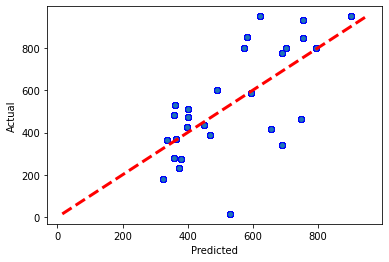

In [195]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pred, y_data_test, edgecolors=(0, 0, 1))
ax.plot([y_data_test.min(), y_data_test.max()], [y_data_test.min(), y_data_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()